In [143]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt


In [13]:
splitCompo = pd.read_csv("/home/sourav/Desktop/nlp project/nlpSpliComp.txt", sep='\t').drop(0)


In [73]:
print splitCompo.columns
print splitCompo.shape[0]

Index([u'compound', u'modifier1(|modifier2)', u'head'], dtype='object')
66241


In [38]:
compoundsWithHypNumbers = splitCompo[~splitCompo['compound'].str.contains('-',flags = re.IGNORECASE)]

In [75]:
print compoundsWithHypNumbers.head(5)
print compoundsWithHypNumbers.shape[0]

     compound comp1   comp2
36   Aalfisch   Aal   Fisch
37  Aalmutter   Aal  Mutter
38  Aalstrich   Aal  Strich
39   Aalsuppe   Aal   Suppe
40    Aaretal  Aare     Tal
64530


In [79]:
compoundsWithHypNumbers.columns = ['compound','comp1','comp2']
comp1Freq = compoundsWithHypNumbers.comp1.value_counts()
comp2Freq = compoundsWithHypNumbers.comp2.value_counts()

In [80]:
print comp1Freq.size
print comp2Freq.size
# total compounds = 66241
# after removing hyphen containing elemnts = 64530
# unique components in comp1 = 10663
# unique components in comp2 = 8216

10663
8216


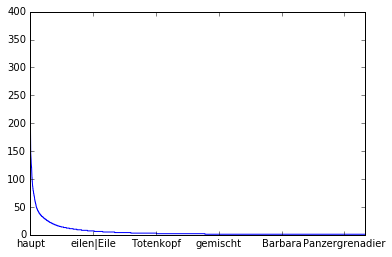

In [98]:
%matplotlib inline
comp1Freq.plot.line()




In [155]:
ku = comp1Freq.keys()

ValueError: could not convert string to float: fdfd

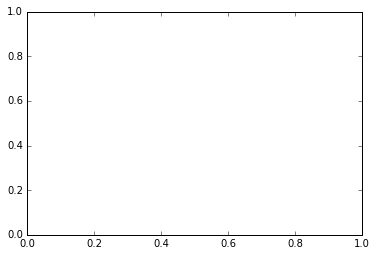

In [160]:
plt.plot(zip([1,2,3,2],["sd","dsds","dsdsd","fdfd"]))

ValueError: could not convert string to float: haupt

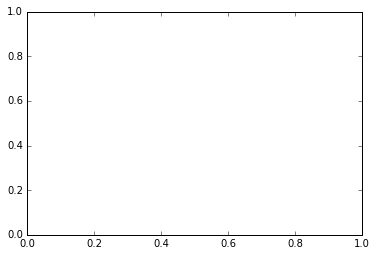

In [158]:
plt.plot(comp1Freq.tolist(),ku.tolist())

In [145]:
plt.savefig("word_count.png")

In [161]:
sdf = comp2Freq.plot


In [109]:
sd = comp2Freq.value_counts().head(101).plot

In [126]:
lt = np.asarray(comp2Freq.keys())

In [128]:
lt.tofile('comp2.csv',sep=',',format='%s')

In [130]:
lt1 = np.asarray(comp1Freq.keys())

In [132]:
lt1.tofile('comp1.csv',sep=",",format='%s')

In [ ]:
fig = plt.figure(figsize=(9,7))
ax1 = fig.add_subplot(111)




x = []
y = []
y_labels = []
y_ticks = []
for i,sub_list in enumerate(mylists):
    y_labels.append(sub_list[-1])
    y_ticks.append(i)
    for v in sub_list[:-1]:
        x.append(v)
        y.append(i)

ax1.set_yticks(y_ticks)
ax1.set_yticklabels(y_labels)
ax1.plot(x, y, "ro")
plt.show()